In [42]:
import keras
import numpy as np
from keras.datasets import fashion_mnist

In [43]:
train , test = fashion_mnist.load_data()

In [44]:
train_jamaal = {'images': train[0], 'labels': train[1]}
test_jamaal = {'images': test[0], 'labels': test[1]}

#Initial Exploration

In [45]:
print('Train Size')
print(train_jamaal["images"].shape)
print(train_jamaal['labels'].shape)

print('Test Size')
print(test_jamaal["images"].shape)
print(test_jamaal['labels'].shape)

Train Size
(60000, 28, 28)
(60000,)
Test Size
(10000, 28, 28)
(10000,)


In [46]:
largest_pixel_value = np.max(train_jamaal["images"])
print('Largest Train Pixel Value', largest_pixel_value)

largest_pixel_value = np.max(test_jamaal["images"])
print('Largest Test Pixel Value', largest_pixel_value)

Largest Train Pixel Value 255
Largest Test Pixel Value 255


In [47]:
train_jamaal["images"] = train_jamaal["images"] / largest_pixel_value
test_jamaal["images"] = test_jamaal["images"] / largest_pixel_value

#Data Preprocessing

In [48]:
import tensorflow as tf

train_jamaal['labels'] = tf.keras.utils.to_categorical(train_jamaal['labels'])
test_jamaal['labels'] = tf.keras.utils.to_categorical(test_jamaal['labels'])


In [49]:
print('Train Labels Size: ', train_jamaal['labels'].shape)
print('Test Labels Size: ', test_jamaal['labels'].shape)

Train Labels Size:  (60000, 10)
Test Labels Size:  (10000, 10)


#Visualization

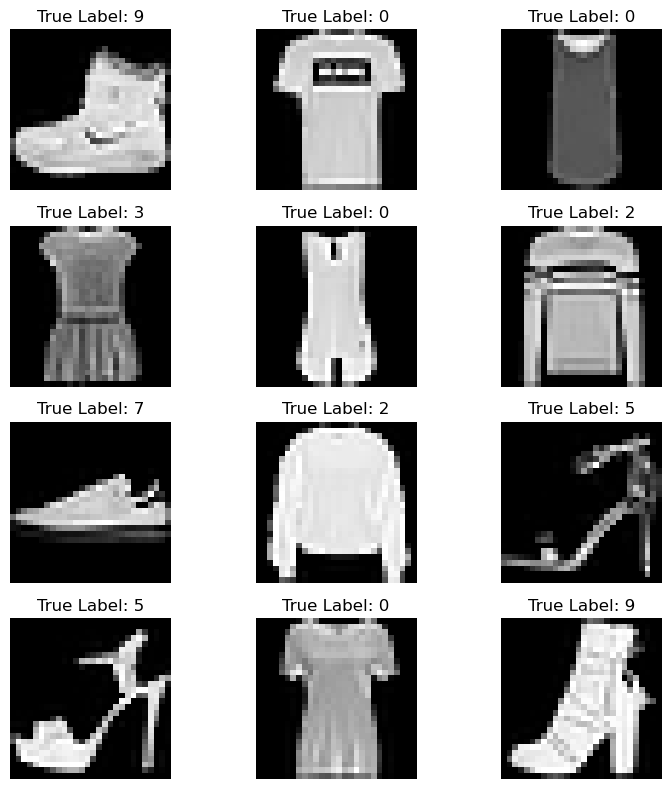

In [50]:
import matplotlib.pyplot as plt

def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {label}')
    plt.axis('off')
    # plt.show()
    
fig = plt.figure(figsize=(8, 8))

for i in range(12):
    ax = fig.add_subplot(4, 3, i+1)
    display_image(train_jamaal['images'][i], np.argmax(train_jamaal['labels'][i]))
    
plt.tight_layout()
plt.show()

#Training Data Preparation

In [51]:
from sklearn.model_selection import train_test_split

x_train_jamaal, x_val_jamaal, y_train_jamaal, y_val_jamaal = train_test_split(train_jamaal['images'], train_jamaal['labels'], test_size=0.3, random_state=42)

print('Training Data Size:', x_train_jamaal.shape)
print('Validation Data Size:', x_val_jamaal.shape)
print('Training Labels Size:', y_train_jamaal.shape)
print('Validation Labels Size:', y_val_jamaal.shape)

Training Data Size: (42000, 28, 28)
Validation Data Size: (18000, 28, 28)
Training Labels Size: (42000, 10)
Validation Labels Size: (18000, 10)


#Build,Train,and Validate CNN Model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model_jamaal = Sequential()

# Add the first convolutional layer
cnn_model_jamaal.add(
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add max pooling layer
cnn_model_jamaal.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
cnn_model_jamaal.add(Conv2D(32, (3, 3), activation='relu'))

# Add max pooling layer
cnn_model_jamaal.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
cnn_model_jamaal.add(Flatten())

# Add fully connected layer with 100 neurons
cnn_model_jamaal.add(Dense(100, activation='relu'))

# Add output layer
cnn_model_jamaal.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model_jamaal.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model_jamaal.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

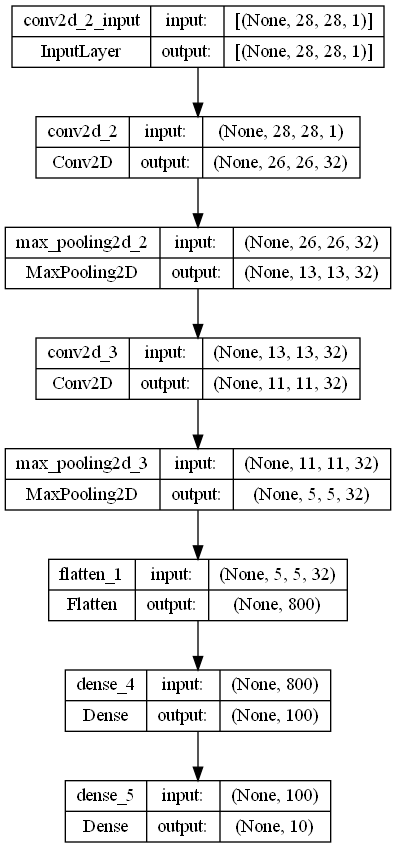

In [53]:
from tensorflow.keras.utils import plot_model

plot_model(cnn_model_jamaal, to_file='model.png',
           show_shapes=True, show_layer_names=True)

In [54]:
cnn_history_jamaal = cnn_model_jamaal.fit(x_train_jamaal, y_train_jamaal, validation_data=(
    x_val_jamaal, y_val_jamaal), epochs=10, batch_size=256)

Epoch 1/10
165/165 [==============================] - 6s 13ms/step - loss: 0.7613 - accuracy: 0.7313 - val_loss: 0.4958 - val_accuracy: 0.8156
Epoch 2/10
165/165 [==============================] - 1s 8ms/step - loss: 0.4693 - accuracy: 0.8291 - val_loss: 0.4365 - val_accuracy: 0.8416
Epoch 3/10
165/165 [==============================] - 1s 7ms/step - loss: 0.4113 - accuracy: 0.8527 - val_loss: 0.4122 - val_accuracy: 0.8524
Epoch 4/10
165/165 [==============================] - 1s 6ms/step - loss: 0.3743 - accuracy: 0.8653 - val_loss: 0.3967 - val_accuracy: 0.8517
Epoch 5/10
165/165 [==============================] - 1s 6ms/step - loss: 0.3561 - accuracy: 0.8720 - val_loss: 0.3645 - val_accuracy: 0.8682
Epoch 6/10
165/165 [==============================] - 1s 6ms/step - loss: 0.3376 - accuracy: 0.8781 - val_loss: 0.3231 - val_accuracy: 0.8834
Epoch 7/10
165/165 [==============================] - 1s 6ms/step - loss: 0.3168 - accuracy: 0.8843 - val_loss: 0.3309 - val_accuracy: 0.8797
Epoch

#Test and Analyze the model

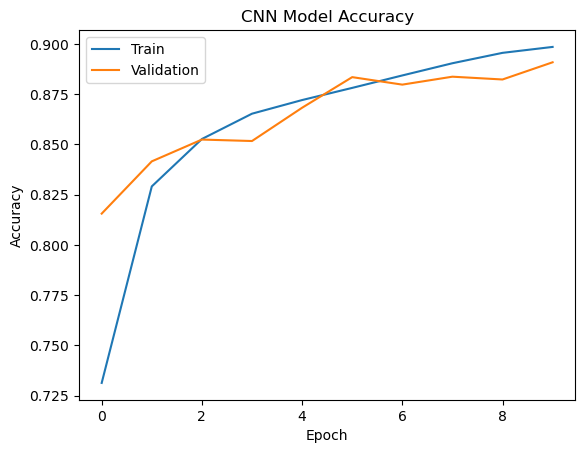

In [55]:
plt.plot(cnn_history_jamaal.history['accuracy'])
plt.plot(cnn_history_jamaal.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [56]:
test_loss, test_accuracy = cnn_model_jamaal.evaluate(
    test_jamaal['images'], test_jamaal['labels'])
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8811
Test Accuracy: 0.8810999989509583


In [57]:
print('Training Accuracy:', cnn_history_jamaal.history['accuracy'][-1])
print('Validation Accuracy:', cnn_history_jamaal.history['val_accuracy'][-1])


Training Accuracy: 0.8984761834144592
Validation Accuracy: 0.89083331823349


In [58]:
cnn_predictions_jamaal = cnn_model_jamaal.predict(test_jamaal['images'])

313/313 [==============================] - 0s 1ms/step


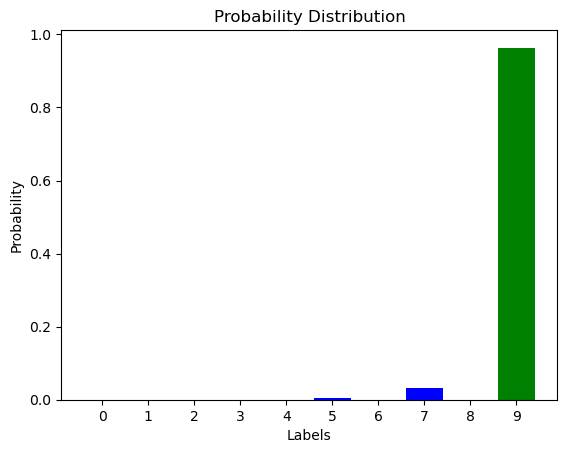

In [59]:
#//create a function that plots the probability distribution of the predictions as a histogram. the function should take the true label of the image and an array with the probability distribution. probability of true labels in gree and predicted labels are in blue 
import numpy as np
import matplotlib.pyplot as plt

def plot_probability_distribution(true_label, probability_distribution):
    # Set the labels for the histogram
    labels = np.arange(len(probability_distribution))
    
    # Set the colors for true and predicted labels
    colors = ['green' if i == true_label else 'blue' for i in labels]
    
    # Plot the histogram
    plt.bar(labels, probability_distribution, color=colors)
    
    # Set the title and labels
    plt.title('Probability Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Probability')
    plt.xticks(labels)
    # Show the plot
    plt.show()


plot_probability_distribution(np.argmax(test_jamaal['labels'][0]), cnn_predictions_jamaal[0])

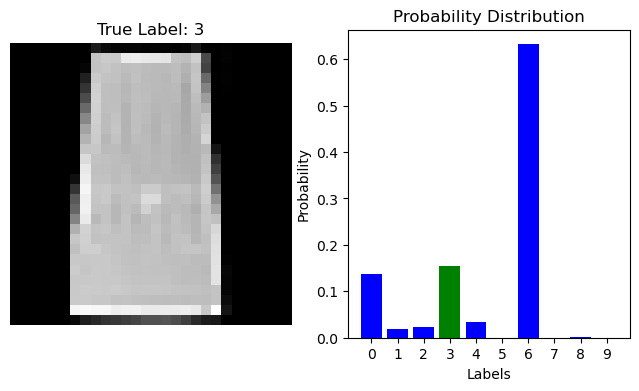

<Figure size 640x480 with 0 Axes>

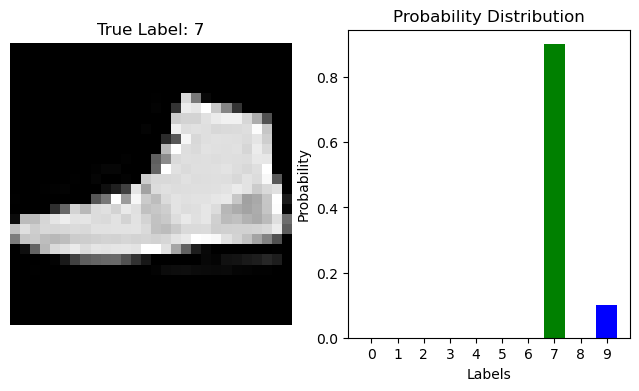

<Figure size 640x480 with 0 Axes>

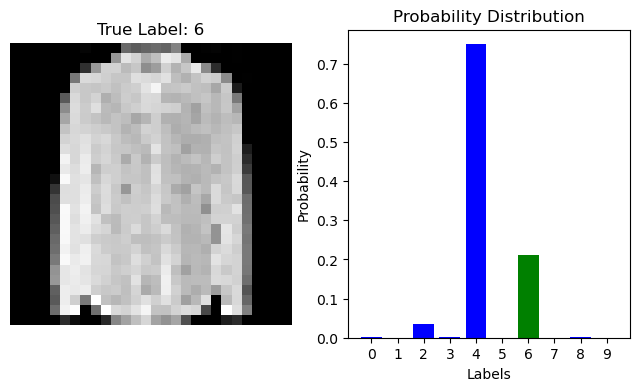

<Figure size 640x480 with 0 Axes>

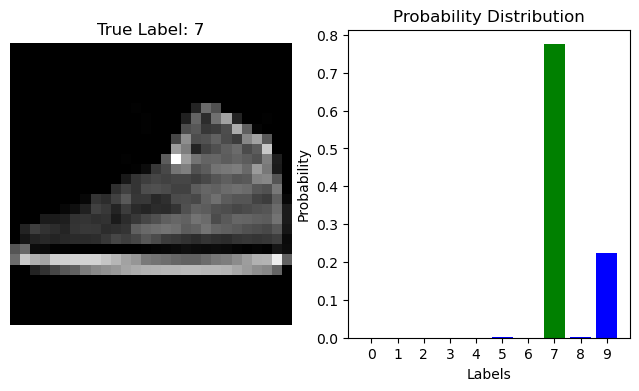

<Figure size 640x480 with 0 Axes>

In [60]:
start_index = 42
num_images = 4

for i in range(start_index, start_index + num_images):
    image = test_jamaal['images'][i]
    true_label = np.argmax(test_jamaal['labels'][i])
    prediction = cnn_predictions_jamaal[i]
    
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plot_probability_distribution(true_label, prediction)
    
    plt.tight_layout()
    plt.show()


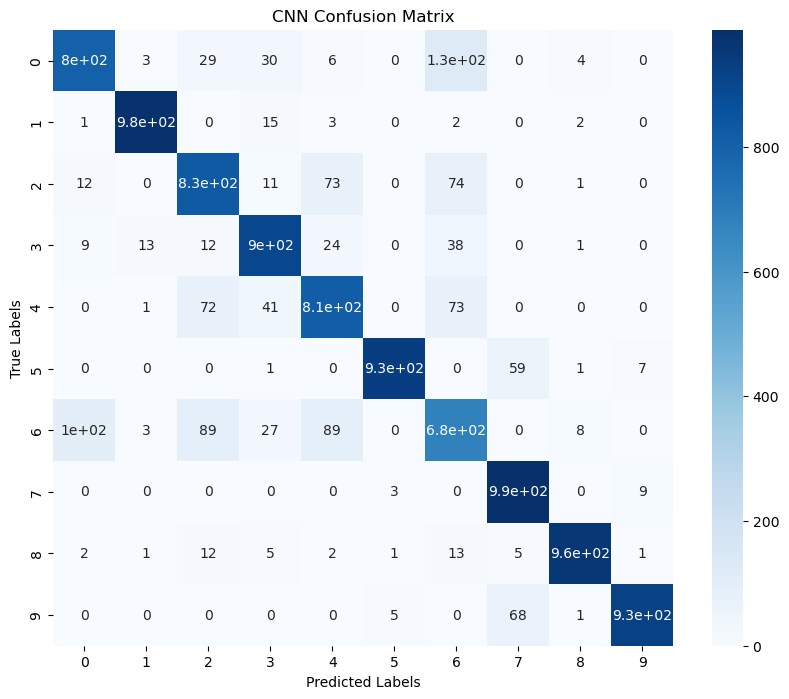

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = np.argmax(cnn_predictions_jamaal, axis=1)

# Get the true labels
true_labels = np.argmax(test_jamaal['labels'], axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Build, Train, Validate, Test, and Analyze RNN Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

rnn_model_jamaal = Sequential()

# Add LSTM layer with 128 units
rnn_model_jamaal.add(LSTM(128, input_shape=(28, 28)))

# Add output layer
rnn_model_jamaal.add(Dense(10, activation='softmax'))

# Compile the model
rnn_model_jamaal.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rnn_model_jamaal.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               80384     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


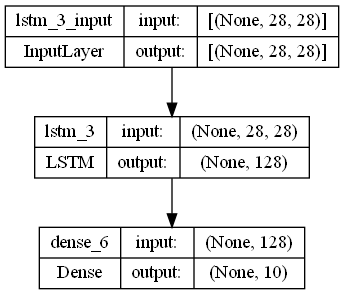

In [63]:
from tensorflow.keras.utils import plot_model

plot_model(rnn_model_jamaal, to_file='model.png',
           show_shapes=True, show_layer_names=True)

In [64]:
rnn_history_jamaal = rnn_model_jamaal.fit(x_train_jamaal, y_train_jamaal, validation_data=(
    x_val_jamaal, y_val_jamaal), epochs=10, batch_size=256)


Epoch 1/10
165/165 [==============================] - 3s 11ms/step - loss: 0.8480 - accuracy: 0.6941 - val_loss: 0.5799 - val_accuracy: 0.7834
Epoch 2/10
165/165 [==============================] - 2s 9ms/step - loss: 0.5107 - accuracy: 0.8130 - val_loss: 0.5052 - val_accuracy: 0.8123
Epoch 3/10
165/165 [==============================] - 2s 11ms/step - loss: 0.4512 - accuracy: 0.8343 - val_loss: 0.4376 - val_accuracy: 0.8363
Epoch 4/10
165/165 [==============================] - 2s 13ms/step - loss: 0.4170 - accuracy: 0.8480 - val_loss: 0.4692 - val_accuracy: 0.8219
Epoch 5/10
165/165 [==============================] - 2s 13ms/step - loss: 0.3989 - accuracy: 0.8532 - val_loss: 0.3913 - val_accuracy: 0.8576
Epoch 6/10
165/165 [==============================] - 2s 12ms/step - loss: 0.3762 - accuracy: 0.8620 - val_loss: 0.3920 - val_accuracy: 0.8581
Epoch 7/10
165/165 [==============================] - 2s 12ms/step - loss: 0.3538 - accuracy: 0.8696 - val_loss: 0.3603 - val_accuracy: 0.8666


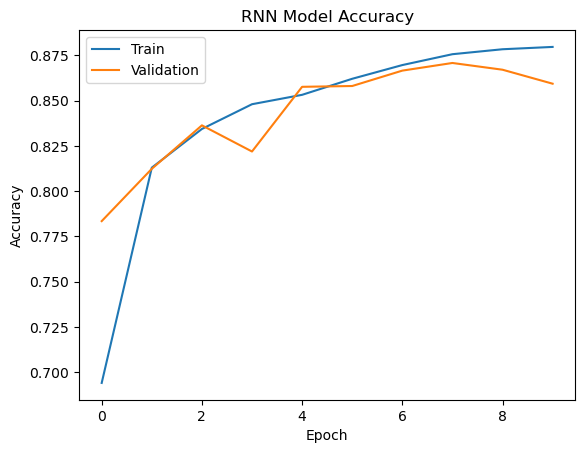

In [65]:
plt.plot(rnn_history_jamaal.history['accuracy'])
plt.plot(rnn_history_jamaal.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [66]:
test_loss, test_accuracy = rnn_model_jamaal.evaluate(test_jamaal['images'], test_jamaal['labels'])
print('Test Accuracy:', test_accuracy)


313/313 [==============================] - 2s 7ms/step - loss: 0.4075 - accuracy: 0.8491
Test Accuracy: 0.8490999937057495


In [67]:
print('Training Accuracy:', rnn_history_jamaal.history['accuracy'][-1])
print('Validation Accuracy:', rnn_history_jamaal.history['val_accuracy'][-1])


Training Accuracy: 0.8796428442001343
Validation Accuracy: 0.859333336353302


In [68]:
rnn_predictions_jamaal = rnn_model_jamaal.predict(test_jamaal['images'])

313/313 [==============================] - 2s 6ms/step


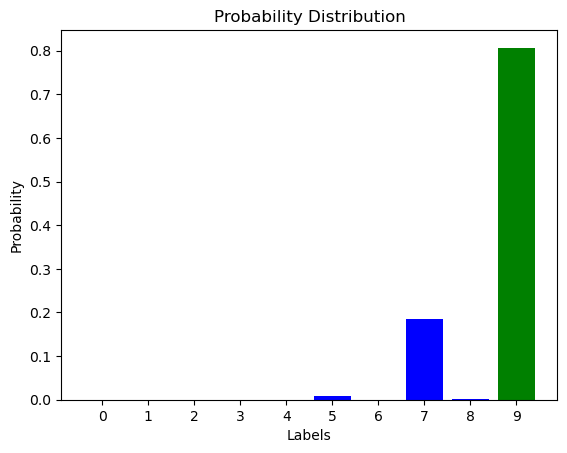

In [69]:
plot_probability_distribution(
    np.argmax(test_jamaal['labels'][0]), rnn_predictions_jamaal[0])

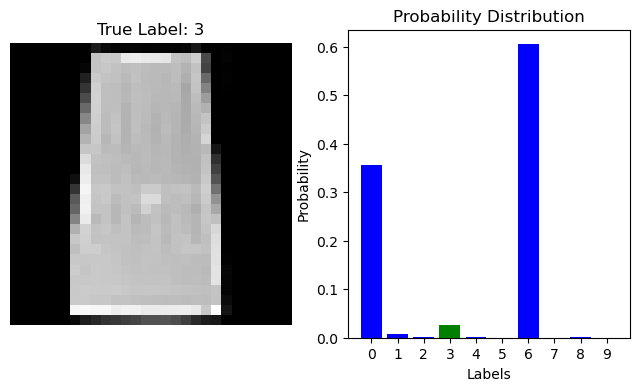

<Figure size 640x480 with 0 Axes>

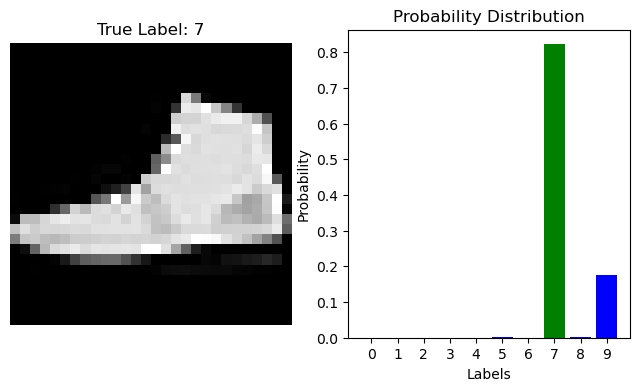

<Figure size 640x480 with 0 Axes>

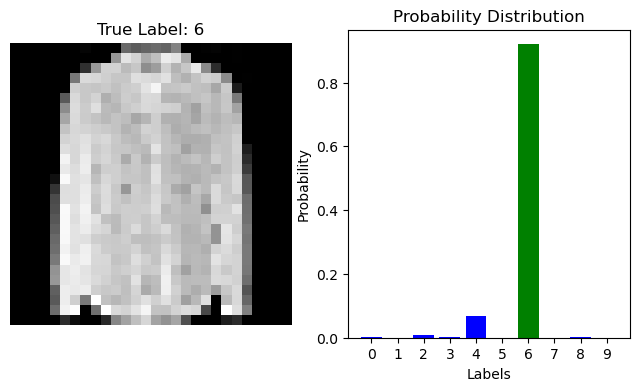

<Figure size 640x480 with 0 Axes>

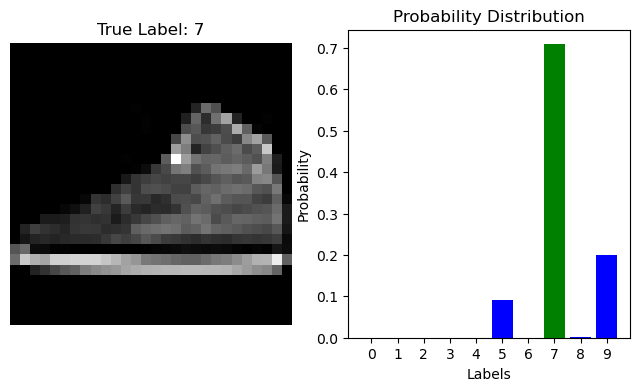

<Figure size 640x480 with 0 Axes>

In [70]:
start_index = 42
num_images = 4

for i in range(start_index, start_index + num_images):
    image = test_jamaal['images'][i]
    true_label = np.argmax(test_jamaal['labels'][i])
    prediction = rnn_predictions_jamaal[i]

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_probability_distribution(true_label, prediction)

    plt.tight_layout()
    plt.show()

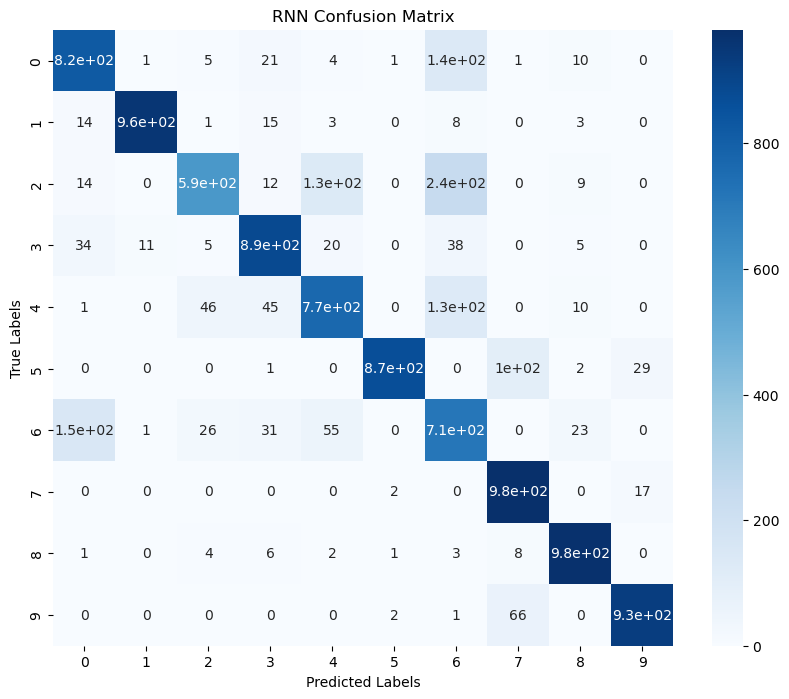

In [71]:
# Get the predicted labels
predicted_labels = np.argmax(rnn_predictions_jamaal, axis=1)

# Get the true labels
true_labels = np.argmax(test_jamaal['labels'], axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()